EXAM 2022, QUESTION 1.4

In [51]:
from sympy import *
from IPython.display import display,Math,Markdown

K,t,tau= symbols('K,t,tau', positive=True)
Ce, U= symbols('Ce,U',cls=Function) #the variable that's part of the differential equation
#TODO: REMEMBER Ce is y(t) a funciton of y and dCe/dt is also a function of Y
#todo: which is why we dont add an extra symbol for 'y(t)'

deq1 = Eq(U(t)*K,Ce(t)+diff(Ce(t))*tau) # A mass balance tank
display (deq1)


C01,f01,ft,Ce,t,V1= symbols('C01,f01,ft,Ce,t,V1', positive=True)
Ce = symbols('Ce',cls=Function)

deq2 = Eq(C01*(f01/ft),Ce(t)+diff(Ce(t))*(V1/ft))
#NO INITIAL CONDITIONS INCLUDED = ANALYTICAL
#solve equations analitically
symbolic_solution1 = dsolve([deq1])

display(Markdown('analytical solution is:'),*symbolic_solution1)

Eq(K*U(t), tau*Derivative(Ce(t), t) + Ce(t))

analytical solution is:

Eq(Ce(t), C1*exp(-t/tau) + K*exp(-t/tau)*Integral(U(t)*exp(t/tau), t)/tau)

In [22]:
from sympy import *
from IPython.display import display,Math,Markdown

t, f, V1, k, Cg0 = symbols('t, f, V1, k, Cg0', positive=True)
Cg1 = symbols('Cg1',cls=Function)

deq1 = Eq(V1*diff(Cg1(t),t), Cg0*f-Cg1(t)*f-k*Cg1(t)*V1) # A mass balance tank
display(deq1)

Eq(V1*Derivative(Cg1(t), t), Cg0*f - V1*k*Cg1(t) - f*Cg1(t))

Steady state question 5

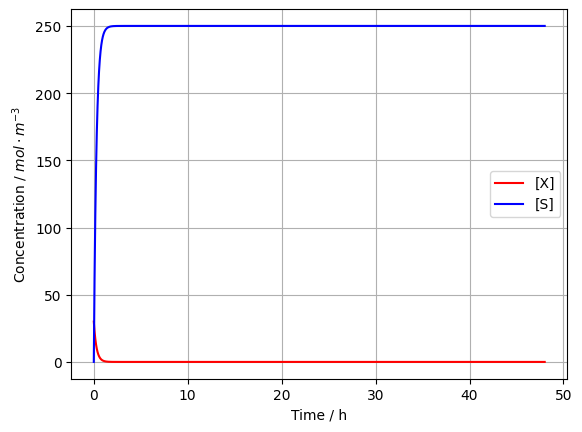

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

initial_biomass = 30
initial_substrate = 0
initial_product = 0
initial_values = np.array([initial_biomass, initial_substrate, initial_product])

f = 0.025 *3600 #L/h
C_in = 250 #g/L
V2 = 25 #L
mu_max = 0.15 #h-1
Ks = 0.015 #g/L
Ki = 150 #g/L
Yxs = 0.65
P_in = 0
timespan = np.linspace(0,48, 2400+1)

def DiffFermentation(time, function):
    dX = mu_max*(function[1]/(Ks + function[1] + ((function[1]**2)/Ki)))*function[0] - f/V2 * function[0]
    dS = -1/Yxs * mu_max*(function[1]/(Ks + function[1] + ((function[1]**2)/Ki)))*function[0] + f/V2 * (C_in - function[1])
    dP = mu_max*(function[1]/(Ks + function[1]+ ((function[1]**2)/Ki)))*function[0] + f/V2 * (P_in - function[2])


    return([dX, dS, dP])

Solution = solve_ivp(DiffFermentation, [timespan[0], timespan[-1]], initial_values, t_eval=timespan, method='LSODA', rtol = 1e-8)
Sol = Solution.y

plt.figure()
plt.plot(timespan,Sol[0],'r',label = '[X]')
plt.plot(timespan,Sol[1],'b',label = '[S]')
plt.legend(loc = 'best')
plt.xlabel('Time / h')
plt.ylabel('Concentration / $mol\cdot m^{-3}$')
plt.grid('minor')


Newtonian laws exercises

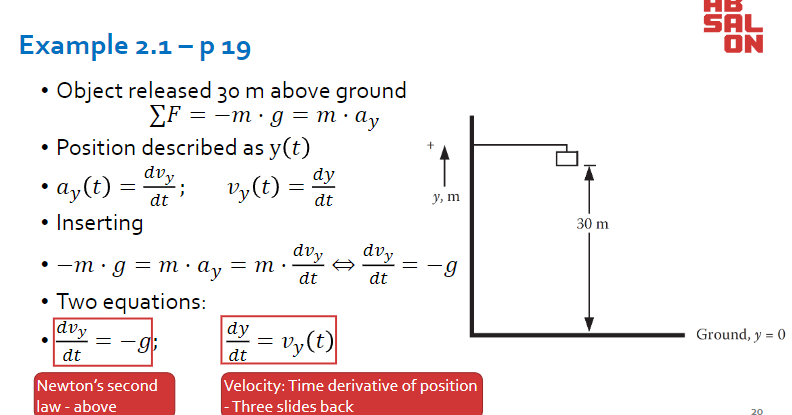

In [1]:
#Newtonian drop without resistance
# one law, all forces: buounacy, gravity and drag
from sympy import *
from IPython.display import display,Math,Markdown

t, g, m, D  = symbols('t, g, m,D', positive=True) #D is for air resistance 
v, y = symbols('v, y',cls=Function) # velocity and height, symbol for differential equation

deqn1 = Eq(diff(v(t),t),-g ) # velocity, left of comma is left of equation, and right is right of equation
deqn2 = Eq(diff(y(t),t), v(t)) # height

In [2]:
deqn1

Eq(Derivative(v(t), t), -g)

In [ ]:
deqn2

Eq(Derivative(y(t), t), v(t))

In [ ]:
#todo change initial condition and parameters
init_cond = {y(0):30,v(0):0} # initial value of height and velocity., height at time 0 is 30, velocity at time 0 is 0
par = [(g,9.82),(m,20), (D,1)] # parameters, gravity, mass and D

symbolic_solution = dsolve((deqn1,deqn2), ics=init_cond)
display(Markdown('Symbolic solution is:'), symbolic_solution[0],symbolic_solution[1])#0 will be displlayed first bc of position of equation

Symbolic solution is:

Eq(v(t), -g*t)

Eq(y(t), -g*t**2/2 + 30)

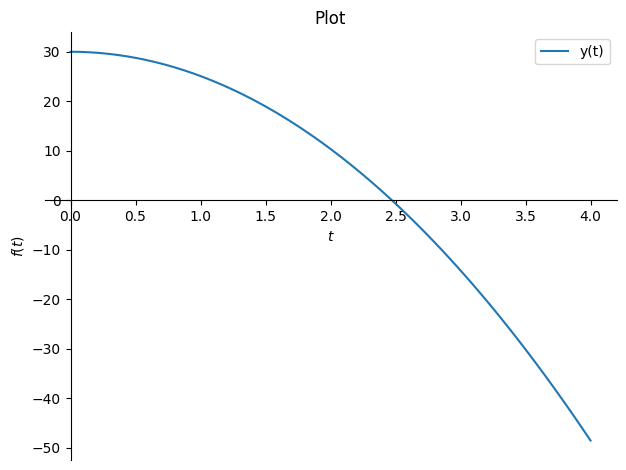

In [ ]:
v_sol=symbolic_solution[0].rhs.subs(par)
y_sol=symbolic_solution[1].rhs.subs(par)
graphs = plot(y_sol,(t,0,4),show=False,legend=True)
graphs[0].label = 'y(t)'
graphs.title = 'Plot'
graphs.show()

In [ ]:
#time is takes for the object to reach heigh 0
time_ground = solve(Eq(y_sol,0))
time_ground

[2.47183729913626]

In [ ]:
#to check 
y_sol.evalf(subs={t:2.472 })

-0.00394944000000026

In [ ]:

v_sol.evalf(subs={t:2.472 })

-24.2750400000000

#Problem 2 - Home assignment

In [3]:
from sympy import *
from IPython.display import display,Math,Markdown

#todo: define the the parameters and initial conditions and the differential equation
t, m, k  = symbols('t, m, k', positive=True)
v, y = symbols('v, y',cls=Function) # velocity and height

dq3 = Eq(diff(y(t),t),v(t)) # velocity
dq4 = Eq(diff(v(t),t), (-k*v(t))/m) # acceleration

In [4]:
dq3

Eq(Derivative(y(t), t), v(t))

In [ ]:
dq4

Eq(Derivative(v(t), t), -k*v(t)/m)

In [ ]:
#change params 
init_cond = {y(0):0,v(0):50} # initial value of time and velocity.
par = [(m,500),(k,100)] # parameters

symbolic_solution = dsolve((dq3,dq4), ics=init_cond)
display(Markdown('Symbolic solution is:'), symbolic_solution[0],symbolic_solution[1])

Symbolic solution is:

Eq(y(t), 50*m/k - 50*m*exp(-k*t/m)/k)

Eq(v(t), 50*exp(-k*t/m))

In [ ]:
v_sol=symbolic_solution[1].rhs.subs(par)
y_sol=symbolic_solution[0].rhs.subs(par)
v_sol

50*exp(-t/5)

In [ ]:
y_sol

250 - 250*exp(-t/5)

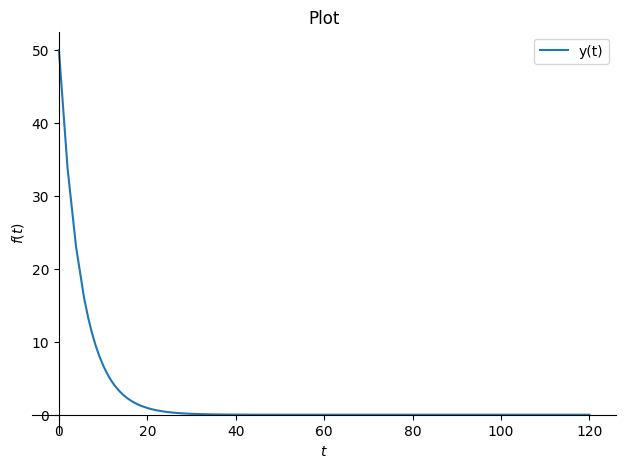

In [ ]:
#todo: change the t (time) from start to finish IN SECONDS
graphs = plot(symbolic_solution[1].rhs.subs(par),(t,0,120),show=False,legend=True)
graphs[0].label = 'y(t)'
graphs.title = 'Plot'
graphs.show()

In [ ]:
# Find the time when velocity is 1 m/s

display(Markdown('Velocity solution v(t):'), v_sol)
display(Markdown('Position solution y(t):'), y_sol)

#nsolve is numerical solving 
#10,30 is the range in time so we need to give taht based on the previous graph
time_to_1ms = nsolve(Eq(v_sol, 1), t, (10, 30))   #specify an initial guess or an interval for the numerical solver to search for the solution.
print(f"The dragster will reach 1 m/s after {time_to_1ms:.2f}s")

# Estimate the distance covered at this time
dist_covered = y_sol.evalf(subs={t: time_to_1ms})
print(f"At that time, the distance covered will be {dist_covered:.2f}m")

Velocity solution v(t):

50*exp(-t/5)

Position solution y(t):

250 - 250*exp(-t/5)

The dragster will reach 1 m/s after 19.56s
At that time, the distance covered will be 245.00m


Object rising through liquid

Dilution

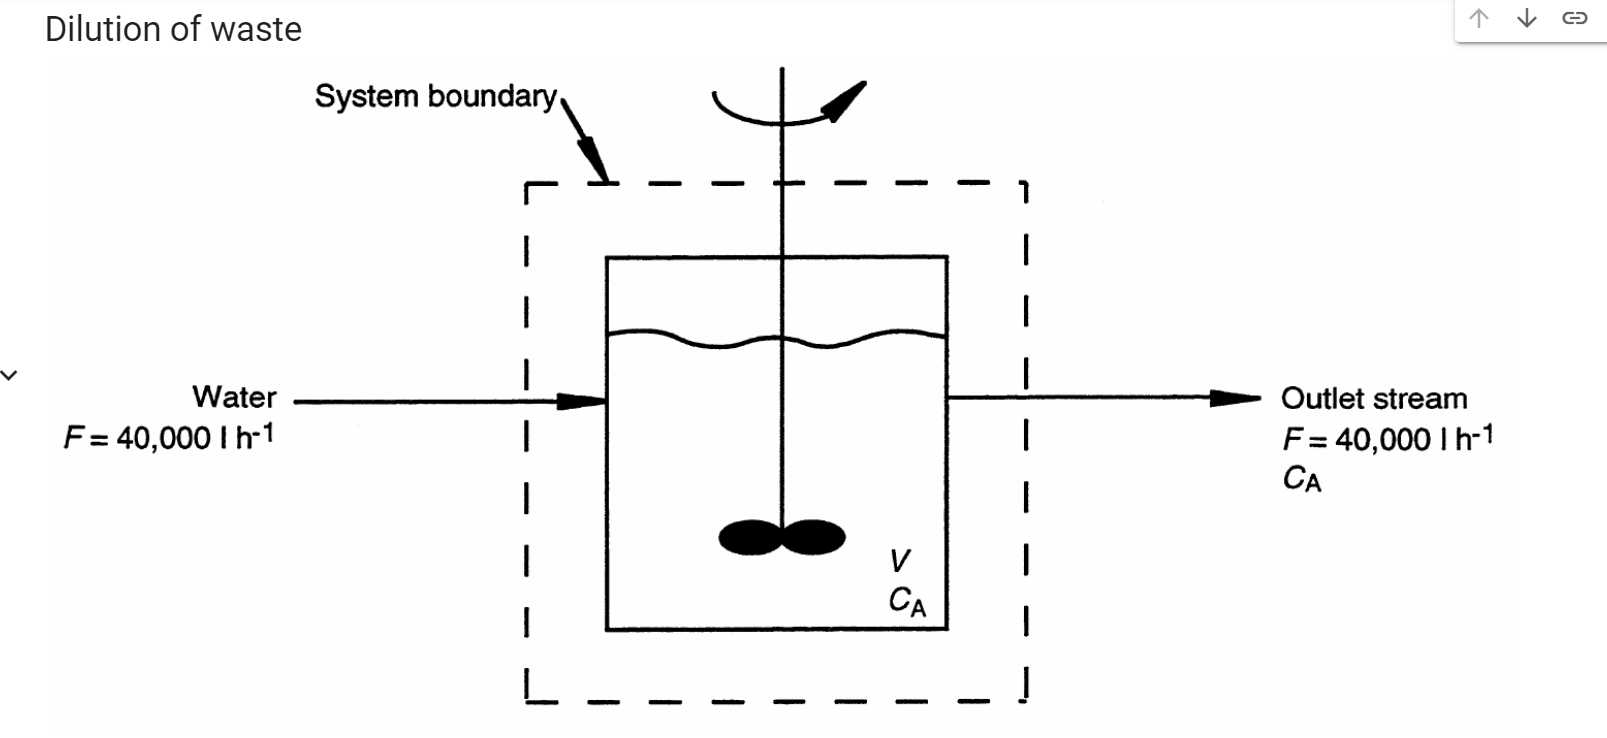

One entering stream,
Pure water,
Tank contains a dissolved component, A,  from the beginning,
One exit stream,
Diluted component stream,
Setting up the model and solving it,
Concentration after 5 h?
Liquid: 440000 l
Solid A: 10000 kg suspended 𝜌𝑙𝑖𝑞𝑢𝑖𝑑=𝜌𝑠𝑜𝑙𝑖𝑑=1000𝑘𝑔/𝑚3


In [ ]:
from IPython.display import display,Math,Markdown
from sympy import *
t,F,rho,V = symbols('t,F,rho,V', positive=True) #Define constants
CA = symbols('CA', cls=Function) # Define variable

deqna = Eq(V*diff(CA(t),t), -F*CA(t)) # Define equation

sol = dsolve(deqna) #Solve equation
sol # report analytical solution

Eq(CA(t), C1*exp(-F*t/V))

In [ ]:
init_cond = {CA(0):0.0227} # initial value of concentration.

par = [(V,440000),(F,40000),(rho,1000)]
sol = dsolve(deqna.subs(par), ics=init_cond)
sol

Eq(CA(t), 0.0227*exp(-t/11))

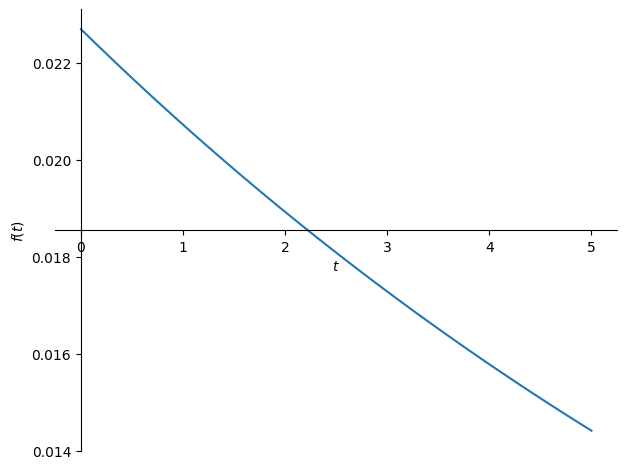

In [ ]:
plot(sol.rhs,(t,0,5)) #Plotting the solution for inspection. Does it make sense? Connect the mathematical model to reality.

In [ ]:
sol.rhs.evalf(subs={t: 5}) #evaluate concentration after 5 hours

0.0144085167099444

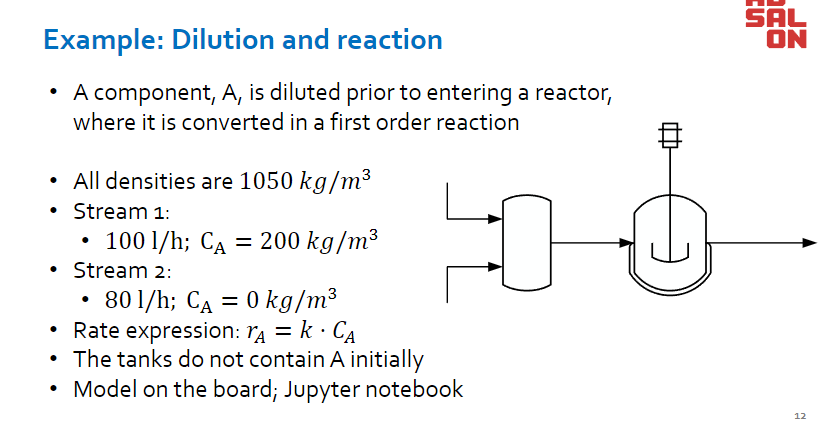

In [ ]:
from sympy import *
from IPython.display import display,Math,Markdown

t, f01, f02, f1, CA01, V1, V2, k = symbols('t, f01, f02, f1, CA01, V1, V2, k', positive=True)
CA1, CA2 = symbols('CA1, CA2',cls=Function) # concentration of A in tank I and II

deqn3 = Eq(V1*diff(CA1(t),t), f01*CA01 - f1*CA1(t)) # A mass balance tank I
deqn4 = Eq(V2*diff(CA2(t),t), f1*CA1(t) - V2*k*CA2(t) -f1*CA2(t)) # A mass balance tank II

In [ ]:
deqn3

Eq(V1*Derivative(CA1(t), t), CA01*f01 - f1*CA1(t))

In [ ]:
deqn4

Eq(V2*Derivative(CA2(t), t), -V2*k*CA2(t) + f1*CA1(t) - f1*CA2(t))

In [ ]:
init_cond = {CA1(0):0,CA2(0):0} # initial value of concentration.
par = [(f1,f01+f02),(f01,0.1),(f02,0.08),(CA01, 200),(V1,2),(V2,4),(k,0.2)]

symbolic_solution = dsolve((deqn3,deqn4), ics=init_cond)
display(Markdown('Symbolic solution is:'), symbolic_solution[0],symbolic_solution[1])

Symbolic solution is:

Eq(CA1(t), -CA01*f01*(V1*(V2*k + f1) - V2*f1)/(f1*(V1*V2*k*exp(f1*t/V1) + V1*f1*exp(f1*t/V1) - V2*f1*exp(f1*t/V1))) + CA01*f01/f1)

Eq(CA2(t), -CA01*V1*f01*exp(-f1*t/V1)/(V1*(V2*k + f1) - V2*f1) + CA01*V2*f01*f1*exp(-t*(V2*k + f1)/V2)/((V1*(V2*k + f1) - V2*f1)*(V2*k + f1)) + CA01*f01/(V2*k + f1))

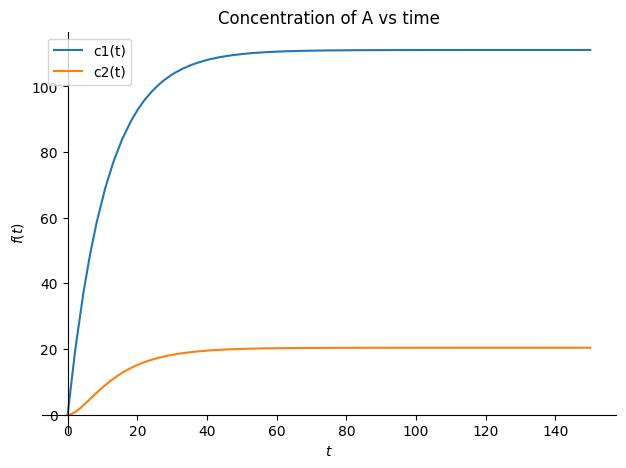

In [ ]:
#using the parameters
C_A1sol=symbolic_solution[0].rhs.subs(par)
C_A2sol=symbolic_solution[1].rhs.subs(par)
#plotting
graphs = plot(C_A1sol,C_A2sol,(t,0,150),legend=True,show=False)
graphs[0].label = 'c1(t)'
graphs[1].label = 'c2(t)'
graphs.title = 'Concentration of A vs time'
graphs.show()

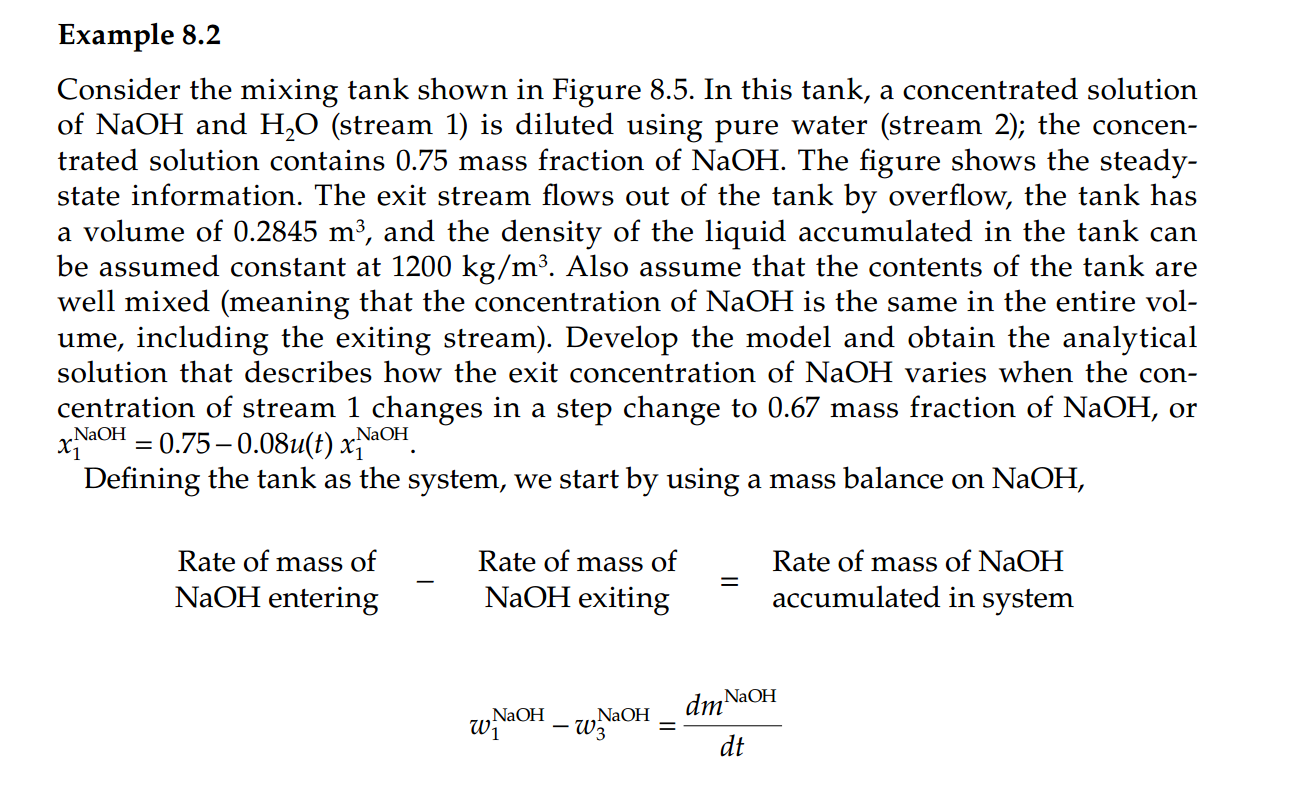

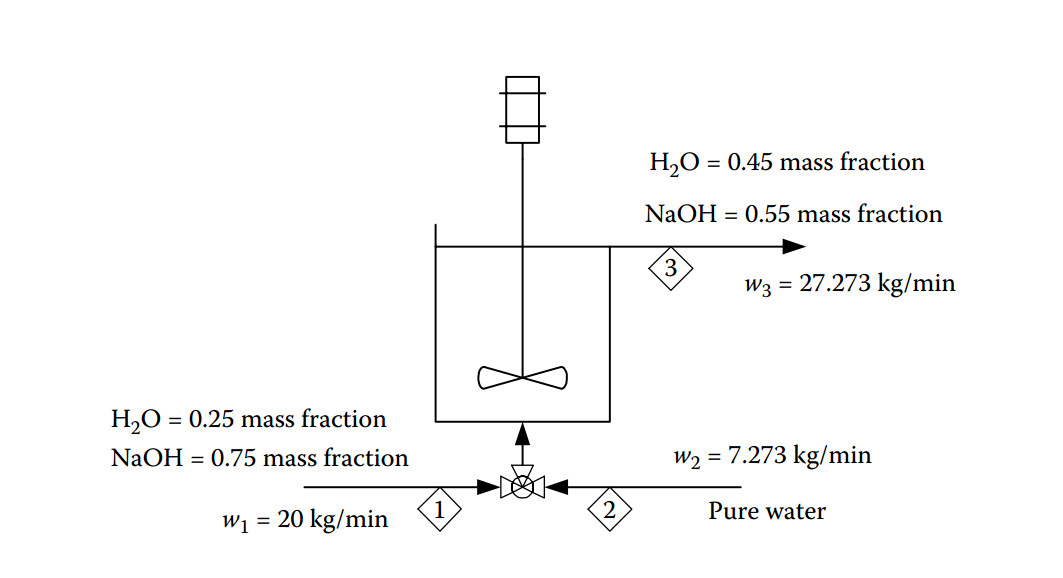

In [ ]:
from sympy import *

t,m,x1,rho,V,w1,w2,w3 = symbols('t,m,x1,rho,V,w1,w2,w3', positive=True)
x3 = symbols('x3', cls=Function)

deqn5 = Eq(m*diff(x3(t),t), w1*x1-w3*x3(t))

sol = dsolve(deqn5)
sol

Eq(x3(t), C1*exp(-t*w3/m) + w1*x1/w3)

In [ ]:
par = [(m,rho*V),(V,0.2845),(rho,1200),(x1,0.75),(w1,20),(w2,7.273),(w3,27.273)]
sol = dsolve(deqn5.subs(par))
sol

Eq(x3(t), C1*exp(-0.0798857644991213*t) + 0.549994500054999)

In [ ]:
#We see that the steady state value of x3 is 0.55 Now x1 suddenly changes from 0.75 to 0.67, so the initial value of x3 must be 0.55

init_cond = {x3(0):0.55} # initial value of x3 is the steady state value

par = [(m,rho*V),(V,0.2845),(rho,1200),(x1,0.67),(w1,20),(w2,7.273),(w3,27.273)]
sol = dsolve(deqn5.subs(par), ics=init_cond)
sol

Eq(x3(t), 0.491328420049133 + 0.058671579950867*exp(-0.0798857644991213*t))

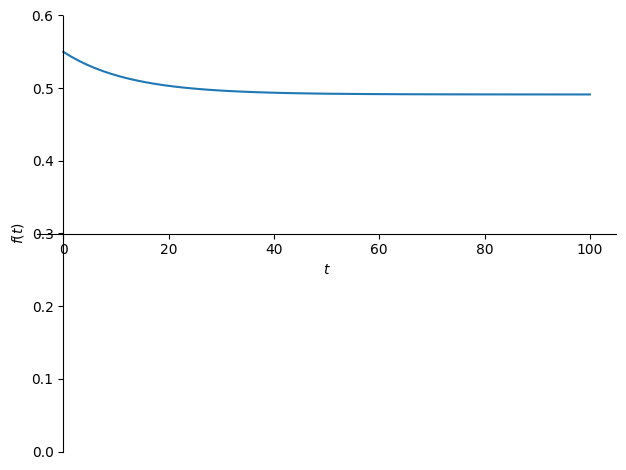

In [ ]:
plot(sol.rhs,(t,0,100),ylim=(0,0.6))

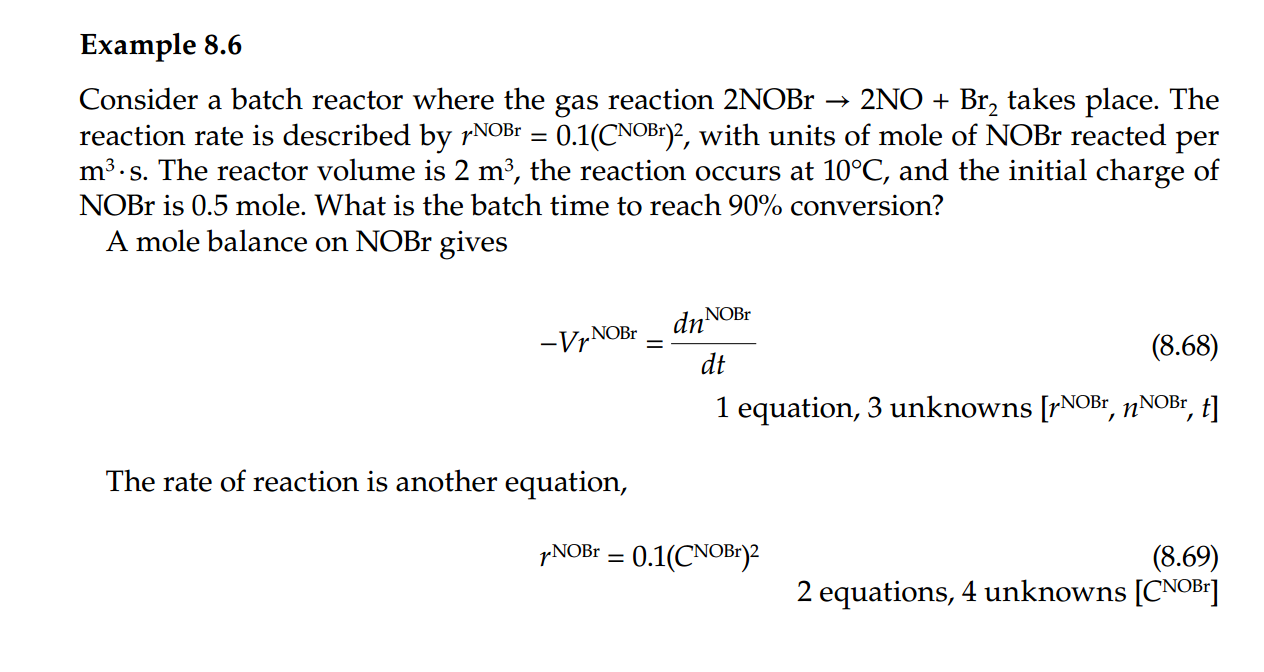

In [ ]:
from sympy import *

t, k,V,c0 = symbols('t,k,V,c0')
c = symbols('c', cls=Function)

deqn6 = Eq(-k*c(t)**2,Derivative(c(t),t))

dsolve(deqn6)

Eq(c(t), 1/(C1 + k*t))

In [ ]:
init_cond = {c(0):c0}
solution = dsolve(deqn6, ics=init_cond)
solution

Eq(c(t), 1/(k*t + 1/c0))

In [ ]:
equation = Eq(solution.rhs,0.1*c0)
solve(equation,t)

[9.0/(c0*k)]

Home assignment 2 - Two CSTR in series

In [11]:
from sympy import *
from IPython.display import display,Math,Markdown

t, f, CA0, V1, V2, k = symbols('t, f, CA0, V1, V2, k', positive=True)
CA1, CA2 = symbols('CA1, CA2',cls=Function)#these are the differential equations 

dq1 = Eq(V1*diff(CA1(t),t), CA0*f-k*CA1(t)*V1-f*CA1(t)) # A mass balance tank I
dq2 = Eq(V2*diff(CA2(t),t), f*CA1(t) - V2*k*CA2(t) -f*CA2(t)) # A mass balance tank II

In [12]:
dq1

Eq(V1*Derivative(CA1(t), t), CA0*f - V1*k*CA1(t) - f*CA1(t))

In [13]:
dq2

Eq(V2*Derivative(CA2(t), t), -V2*k*CA2(t) + f*CA1(t) - f*CA2(t))

In [14]:
#at steady state 'rhs' right hand side 
#ADD  FOR 

steadystate = solve((Eq(dq1.rhs,0),Eq(dq2.rhs,0)),[CA1(t),CA2(t)])
steadystate

{CA1(t): CA0*f/(V1*k + f),
 CA2(t): CA0*f**2/(V1*V2*k**2 + V1*f*k + V2*f*k + f**2)}

In [15]:
#finding concentrations

In [16]:
par = [(f,20),(CA0,2),(V1,200),(V2,100),(k,0.048)] #defining parameters
solved_steadystate = steadystate[CA1(t)] #solve for concenetraion at steady state
print(f"CA1(t): {solved_steadystate.subs(par)}")

CA1(t): 1.35135135135135


In [17]:
par = [(f,20),(CA0,2),(V1,200),(V2,100),(k,0.048)] #defining parameters
solved_steadystate = steadystate[CA2(t)]
print(f"CA2(t): {solved_steadystate.subs(par)}")

CA2(t): 1.08979947689625


In [20]:
#NO INITIAL CONDITIONS INCLUDED = ANALYTICAL
#solve equations analitically
symbolic_solution1 = dsolve([dq1, dq2])
display(Markdown('analytical solution is:'),*symbolic_solution1)

analytical solution is:

Eq(CA1(t), C1*(V1 - V2)*exp(-t*(V1*k + f)/V1)/V1 + CA0*f/(V1*k + f))

Eq(CA2(t), C1*exp(-t*(V1*k + f)/V1) + C2*exp(-t*(V2*k + f)/V2) + CA0*f*(V1*(V2*k + f) - V2*(V1*k + f))/((V1 - V2)*(V1*k + f)*(V2*k + f)))

In [19]:
#INITIAL CONDITIONS INCLUDED = SYMBOLIC 

#solve equations
init_cond = {CA1(0):0,CA2(0):0} # initial value of concentration.
par = [(f,20),(CA0, 2),(V1,200),(V2,100),(k,0.048)]

solution = dsolve((dq1,dq2), ics=init_cond)
display(Markdown('Symbolic olution is:'), solution[0],solution[1])

Solution is:

Eq(CA1(t), CA0*f/(V1*k + f) - CA0*f*exp(-t*(V1*k + f)/V1)/(V1*k + f))

Eq(CA2(t), -CA0*V1*f*exp(-t*(V1*k + f)/V1)/((V1 - V2)*(V1*k + f)) + CA0*V2*f*exp(-t*(V2*k + f)/V2)/((V1 - V2)*(V2*k + f)) + CA0*f*(V1*(V2*k + f) - V2*(V1*k + f))/((V1 - V2)*(V1*k + f)*(V2*k + f)))

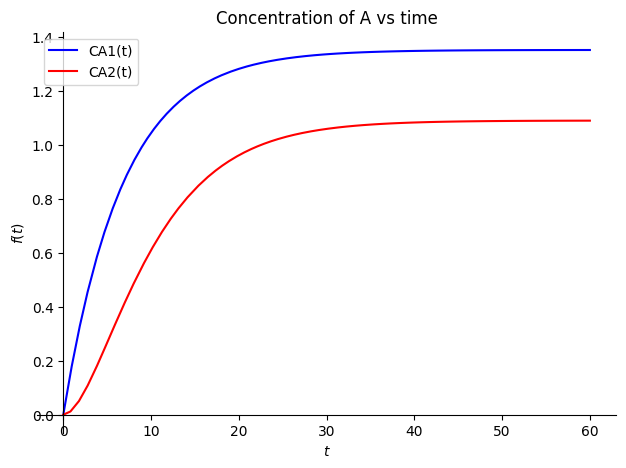

In [ ]:
#using the parameters
C_A1sol=solution[0].rhs.subs(par)
C_A2sol=solution[1].rhs.subs(par)
#plotting
graphs = plot(C_A1sol,(t,0,60),line_color='blue',label='CA1(t)', legend=True,  show=False)   #idk how to move the legend
graphs.append(plot(C_A2sol,(t,0,60),line_color='red',label='CA2(t)', show=False)[0])
graphs.title = 'Concentration of A vs time'
graphs.show()

Exam 2023 - Bioreaction

In [ ]:
from sympy import *
from IPython.display import display,Math,Markdown

t, f, V1, k, Cg0 = symbols('t, f, V1, k, Cg0', positive=True)
Cg1 = symbols('Cg1',cls=Function)

deq1 = Eq(V1*diff(Cg1(t),t), Cg0*f-Cg1(t)*f-k*Cg1(t)*V1) # A mass balance tank

In [ ]:
deq1

Eq(V1*Derivative(Cg1(t), t), Cg0*f - V1*k*Cg1(t) - f*Cg1(t))

In [ ]:
init_cond1 = {Cg1(0):0} # initial value of concentration.
par = [(f,50),(Cg0, 2),(V1,700),(k,2.7)]

symbolic_solutiona = dsolve((deq1), ics=init_cond1)
symbolic_solutiona

Eq(Cg1(t), Cg0*f/(V1*k + f) - Cg0*f*exp(-t*(k + f/V1))/(V1*k + f))

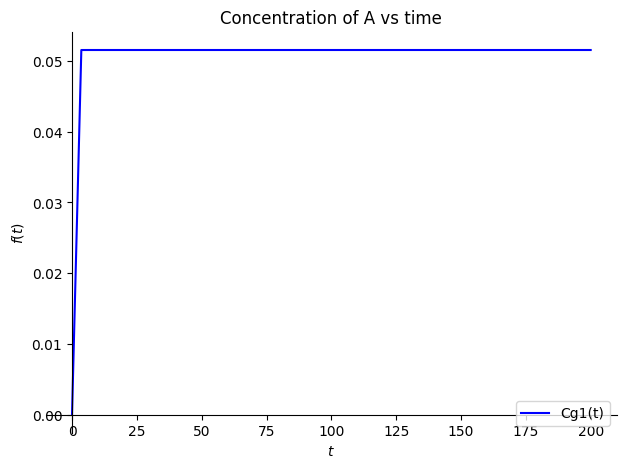

In [ ]:
#using the parameters
solution = symbolic_solutiona.rhs.subs(par)
#plotting
graphs = plot(solution,(t,0,200),line_color='blue',label='Cg1(t)', legend=True,  show=False)   #idk how to move the legend

graphs.title = 'Concentration of A vs time'
graphs.show()